In [1]:
import sys, os, glob, time
import numpy as np
import matplotlib.pyplot as plt
import fitsio

In [2]:
sys.path.append('../py') #this works if you are in the Sandbox directory, check with os.getcwd()

In [3]:
from LSS.imaging  import densvar

256 True


In [29]:
import importlib

In [31]:
importlib.reload(densvar)

256 True


<module 'LSS.imaging.densvar' from '../py/LSS/imaging/densvar.py'>

In [4]:
version = 'test'
tarver = '0.49.0'
sdir = os.environ['CSCRATCH']+'/tarcat/v'+version+'/tv'+tarver+'/'

In [79]:
fr = fitsio.read('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.49.0/randomsDR9v0.49.0_0_masked.fits')

In [6]:
fd = fitsio.read('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.49.0/ELGtargetsDR9v0.49.0_masked.fits')

In [61]:
fdf = fitsio.read('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.50.0/ELG_FDR_GFIBsv1targetsDR9v0.50.0_masked.fits')

randoms done
data done


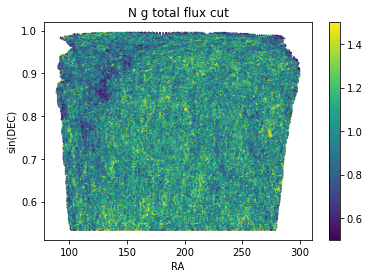

randoms done
data done


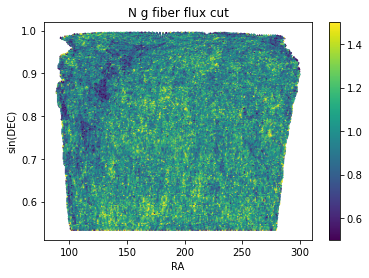

randoms done
data done


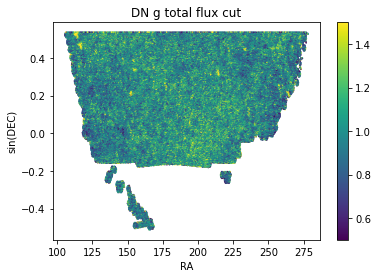

randoms done
data done


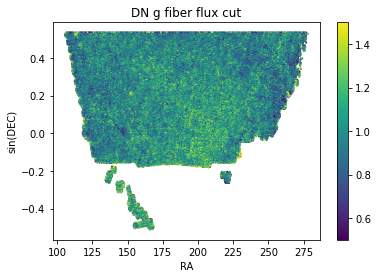

randoms done
data done


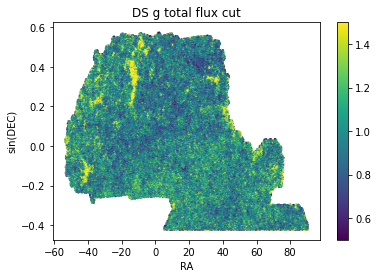

randoms done
data done


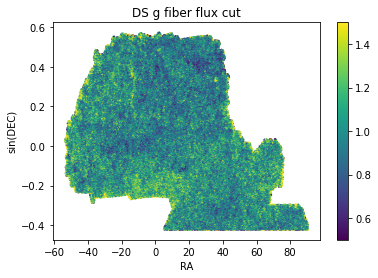

In [63]:
regl = ['N','DN','DS']
for reg in regl:
    densvar.plot_hpdens(fr,fd,reg,titl=reg+' g total flux cut')
    densvar.plot_hpdens(fr,fdf,reg,titl=reg+' g fiber flux cut')

randoms done
data done
97717
97717


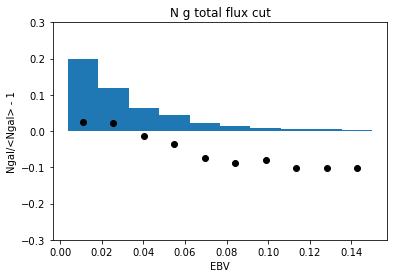

fraction of randoms not included in plot: 0.010202270901526323
randoms done
data done
97717
97717


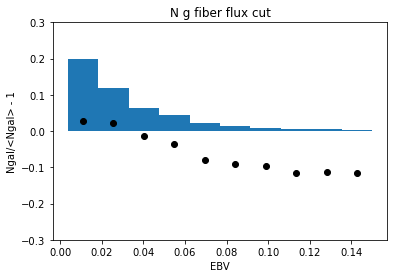

fraction of randoms not included in plot: 0.010202270901526323


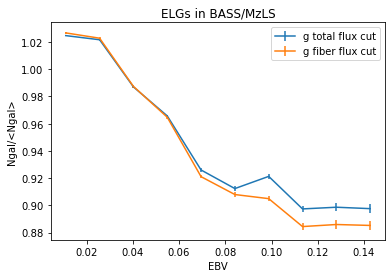

randoms done
data done
113630
113630


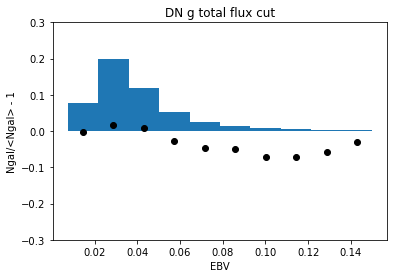

fraction of randoms not included in plot: 0.0060018369866483064
randoms done
data done
113630
113630


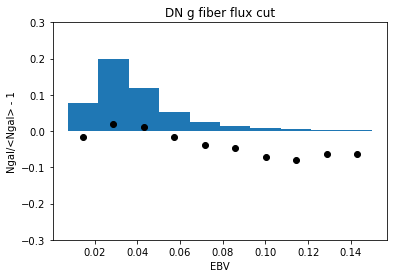

fraction of randoms not included in plot: 0.0060018369866483064


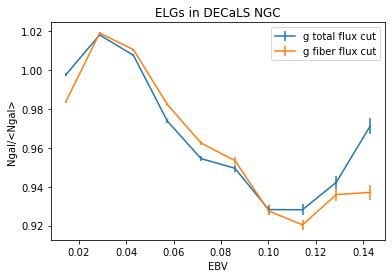

randoms done
data done
102271
102271


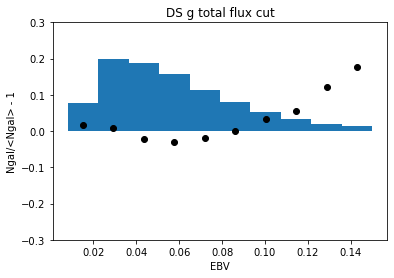

fraction of randoms not included in plot: 0.03135138218105747
randoms done
data done
102271
102271


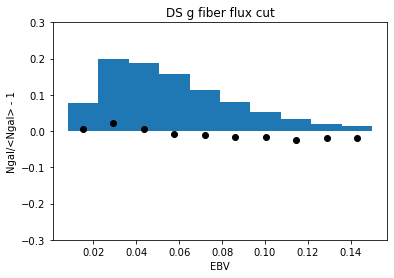

fraction of randoms not included in plot: 0.03135138218105747


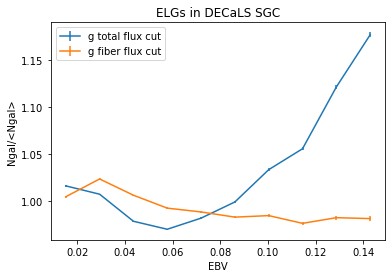

randoms done
data done
97717
97717


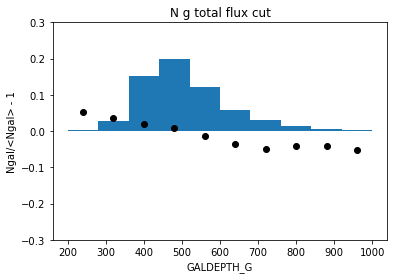

fraction of randoms not included in plot: 0.008323955458950602
randoms done
data done
97717
97717


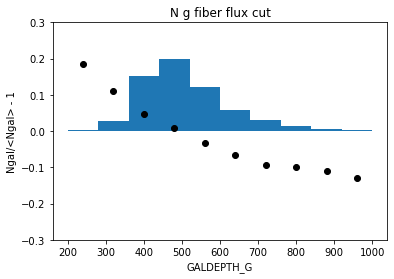

fraction of randoms not included in plot: 0.008323955458950602


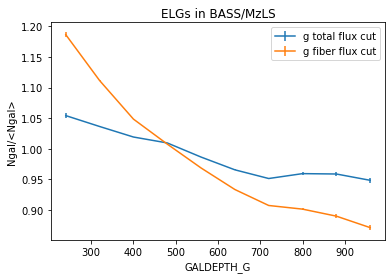

randoms done
data done
113630
113630


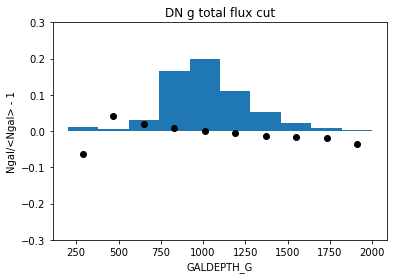

fraction of randoms not included in plot: 0.007738238292920533
randoms done
data done
113630
113630


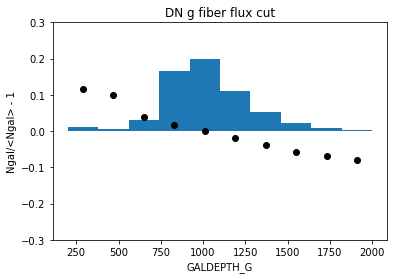

fraction of randoms not included in plot: 0.007738238292920533


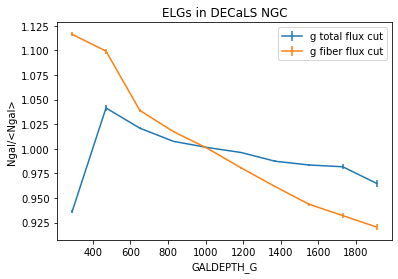

randoms done
data done
102271
102271


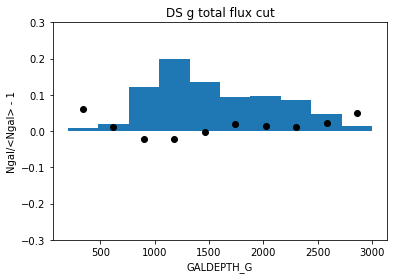

fraction of randoms not included in plot: 0.011691351259963293
randoms done
data done
102271
102271


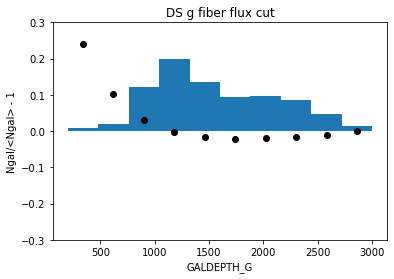

fraction of randoms not included in plot: 0.011691351259963293


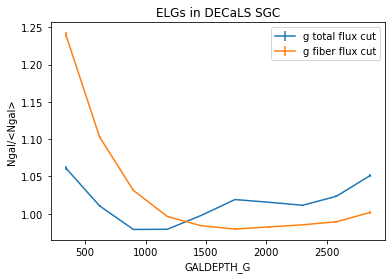

randoms done
data done
97717
97717


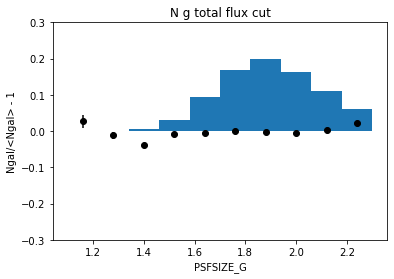

fraction of randoms not included in plot: 0.05037657090101247
randoms done
data done
97717
97717


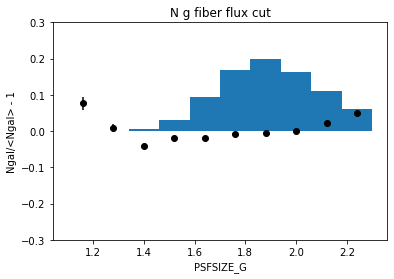

fraction of randoms not included in plot: 0.05037657090101247


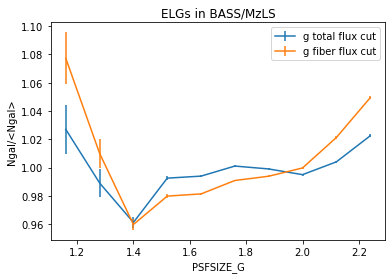

randoms done
data done
113630
113630


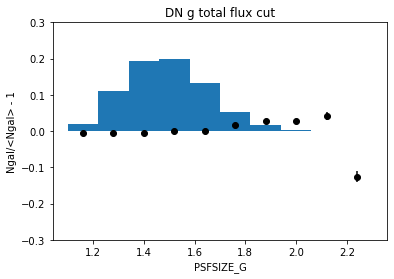

fraction of randoms not included in plot: 0.003908427516064449
randoms done
data done
113630
113630


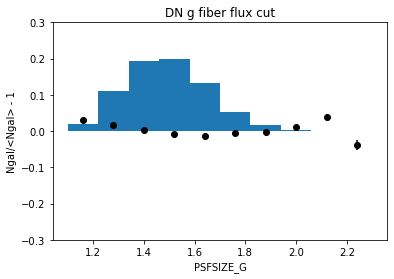

fraction of randoms not included in plot: 0.003908427516064449


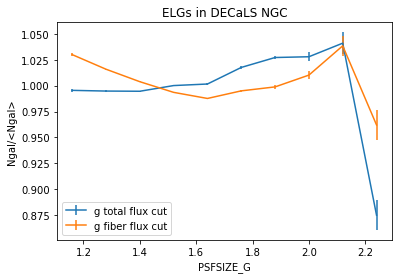

randoms done
data done
102271
102271


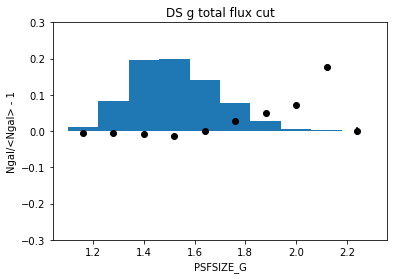

fraction of randoms not included in plot: 0.0023697209564762173
randoms done
data done
102271
102271


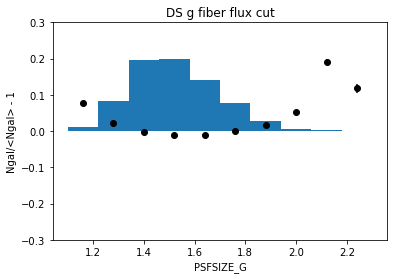

fraction of randoms not included in plot: 0.0023697209564762173


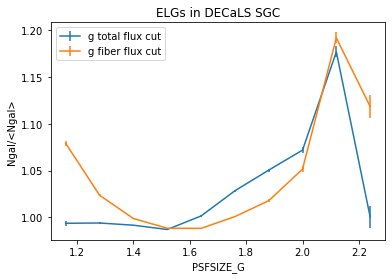

randoms done
data done
97717
97717


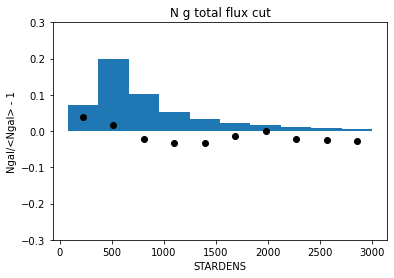

fraction of randoms not included in plot: 0.021071955273962394
randoms done
data done
97717
97717


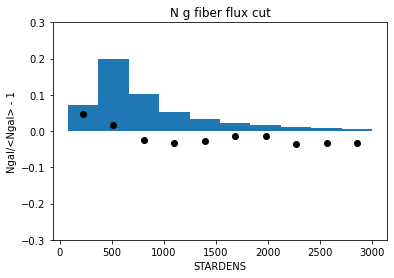

fraction of randoms not included in plot: 0.021071955273962394


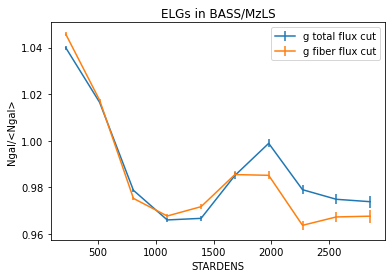

randoms done
data done
113630
113630


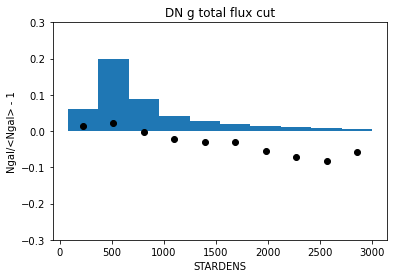

fraction of randoms not included in plot: 0.010543019042958023
randoms done
data done
113630
113630


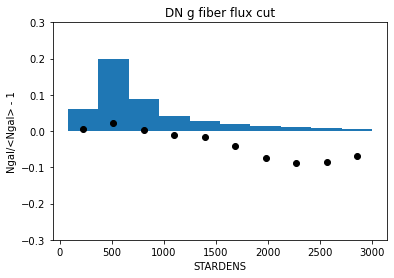

fraction of randoms not included in plot: 0.010543019042958023


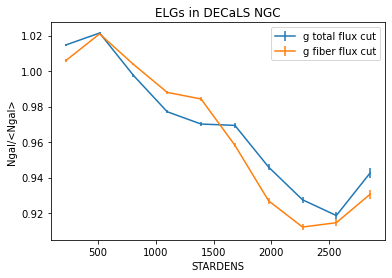

randoms done
data done
102271
102271


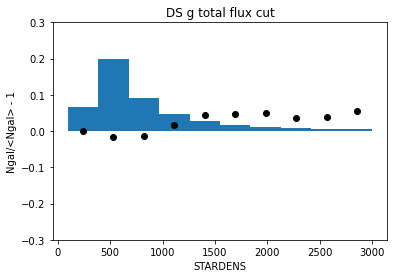

fraction of randoms not included in plot: 0.011255359758171785
randoms done
data done
102271
102271


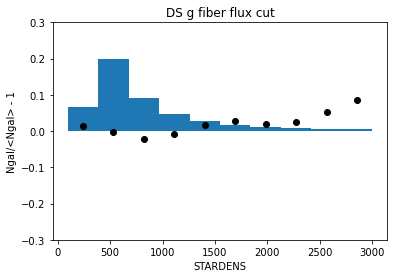

fraction of randoms not included in plot: 0.011255359758171785


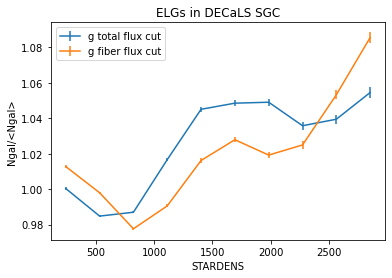

In [67]:
parl = ['EBV','GALDEPTH_G','PSFSIZE_G','STARDENS']
for par in parl:
    vmax = None
    vmin = None
    if par == 'EBV':
        vmax = 0.15
    if par == 'STARDENS':
        vmax = 3000
    if par == 'PSFSIZE_G':    
        vmin = 1.1
        vmax = 2.3
    if par == 'GALDEPTH_G':
        vmin = 200
        
    for reg in regl:
        if par == 'GALDEPTH_G':
            if reg == 'N':
                vmax = 1000
            if reg == 'DN':
                vmax = 2000
            if reg == 'DS':
                vmax = 3000
        bc,sv,ep = densvar.densvsimpar_pix(fr,fd,par,reg=reg,xlab=par,titl=reg+' g total flux cut',vmax=vmax,vmin=vmin)
        bcf,svf,epf = densvar.densvsimpar_pix(fr,fdf,par,reg=reg,xlab=par,titl=reg+' g fiber flux cut',vmax=vmax,vmin=vmin)
        plt.errorbar(bc,sv,ep,label='g total flux cut')
        plt.errorbar(bcf,svf,epf,label='g fiber flux cut')
        plt.legend()
        if reg == 'N':
            plt.title('ELGs in BASS/MzLS')
        if reg == 'DN':
            plt.title('ELGs in DECaLS NGC')
        if reg == 'DS':
            plt.title('ELGs in DECaLS SGC')
        plt.xlabel(par)
        plt.ylabel('Ngal/<Ngal>')
        plt.show()

## compare to Obiwan results

In [69]:
#Just going to look in BASS/MzLS region
fn = fitsio.read('/global/cscratch1/sd/adematti/legacysim/dr9/ebv1000shaper/north/file0_rs0_skip0/merged/matched_input.fits')

In [70]:
win = (fn['input_nobs_g'] >0 ) & (fn['input_nobs_r'] >0 ) &(fn['input_nobs_z'] >0 )
#win = (f['nobs_g'] >0 ) & (f['nobs_r'] >0 ) &(f['nobs_z'] >0 )
wo = win & (fn['ra']*0 == 0)
print(len(fn[win]))
print(len(fn[wo]))

121821
107375


In [71]:
gflux = fn['flux_g']/fn['mw_transmission_g']
gfibflux = fn['fiberflux_g']/fn['mw_transmission_g']
rflux = fn['flux_r']/fn['mw_transmission_r']
zflux = fn['flux_z']/fn['mw_transmission_z']

In [72]:
from desitarget.sv1 import sv1_cuts

In [73]:
svgtot, svgfib, fdrgtot, fdrgfib = sv1_cuts.isELG_colors(gflux, rflux, zflux,gfiberflux=gfibflux,south=False)

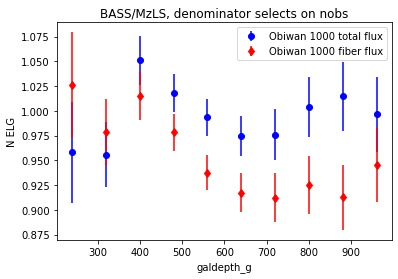

In [81]:
wt = win & (fn['ra']*0 == 0) & fdrgtot
wf = win & (fn['ra']*0 == 0) & fdrgfib
oht = plt.hist(fn[wt]['input_galdepth_g'],range=(200,1000))#,range=(0.002,.152))
ohf = plt.hist(fn[wf]['input_galdepth_g'],range=(200,1000))
ih = plt.hist(fn[win]['input_galdepth_g'],range=(200,1000))#,range=(0.002,.152))
plt.clf()
norm = len(fn[win])/len(fn[wt])#1.05/(oht[0][0]/ih[0][0])#
et = np.sqrt(oht[0])/ih[0]
ef = np.sqrt(ohf[0])/ih[0]
plt.errorbar(oht[1][:-1]+40,oht[0]/ih[0]*norm,et*norm,fmt='bo',label='Obiwan 1000 total flux')
plt.errorbar(ohf[1][:-1]+40,ohf[0]/ih[0]*norm,ef*norm,fmt='rd',label='Obiwan 1000 fiber flux')
#plt.plot(bv,dv,'k--',label='DR9 data')
plt.xlabel('galdepth_g')
plt.ylabel('N ELG')
plt.title('BASS/MzLS, denominator selects on nobs')
plt.legend()
plt.show()

In [77]:
importlib.reload(densvar)

256 True


<module 'LSS.imaging.densvar' from '../py/LSS/imaging/densvar.py'>

In [75]:
#compare to ELGs on same bricks
bl = np.unique(fn['brickid'])

randoms done
data done
1801
1801


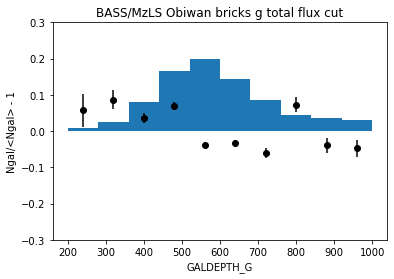

fraction of randoms not included in plot: 0.04947355067867563
randoms done
data done
1801
1801


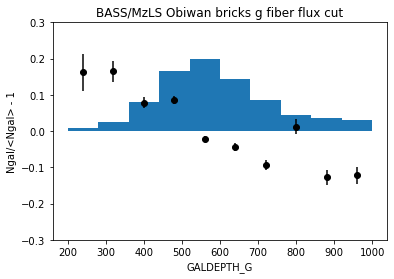

fraction of randoms not included in plot: 0.04947355067867563


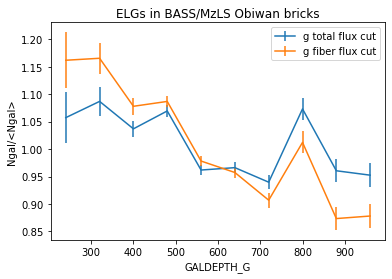

In [82]:
vmin=200
vmax=1000
bc,sv,ep = densvar.densvsimpar_pix(fr,fd,'GALDEPTH_G',reg='N',bl=bl,xlab='GALDEPTH_G',titl='BASS/MzLS Obiwan bricks g total flux cut',vmax=vmax,vmin=vmin)
bcf,svf,epf = densvar.densvsimpar_pix(fr,fdf,'GALDEPTH_G',reg='N',bl=bl,xlab='GALDEPTH_G',titl='BASS/MzLS Obiwan bricks g fiber flux cut',vmax=vmax,vmin=vmin)
plt.errorbar(bc,sv,ep,label='g total flux cut')
plt.errorbar(bcf,svf,epf,label='g fiber flux cut')
plt.legend()
plt.title('ELGs in BASS/MzLS Obiwan bricks')
plt.xlabel('GALDEPTH_G')
plt.ylabel('Ngal/<Ngal>')
plt.show()

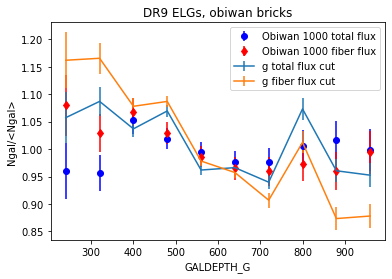

In [89]:
normt = sum(ih[0])/sum(oht[0])
normf = sum(ih[0])/sum(ohf[0])
plt.errorbar(oht[1][:-1]+40,oht[0]/ih[0]*normt,et*normt,fmt='bo',label='Obiwan 1000 total flux')
plt.errorbar(ohf[1][:-1]+40,ohf[0]/ih[0]*normf,ef*normf,fmt='rd',label='Obiwan 1000 fiber flux')
plt.errorbar(bc,sv,ep,label='g total flux cut')
plt.errorbar(bcf,svf,epf,label='g fiber flux cut')
plt.legend()
plt.xlabel('GALDEPTH_G')
plt.ylabel('Ngal/<Ngal>')
plt.title('DR9 ELGs, obiwan bricks')
plt.show()

In [5]:
gfw = fd['FLUX_G']/fd['MW_TRANSMISSION_G']

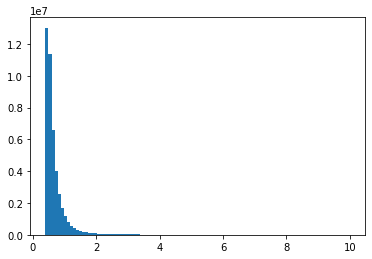

In [8]:
plt.hist(gfw,bins=100)
plt.show()

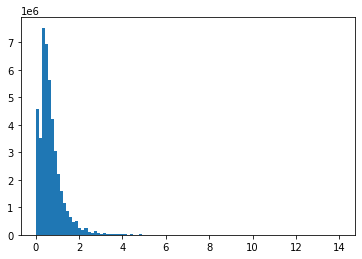

In [27]:
plt.hist(fd['SHAPE_R'],bins=100)
plt.show()

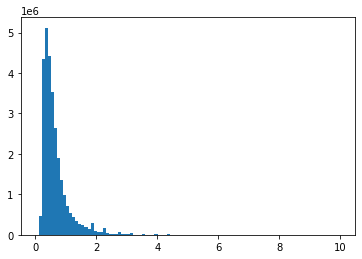

In [28]:
selg = fd['MORPHTYPE'] == 'REX'
plt.hist(fd[selg]['SHAPE_R'],bins=100)
plt.show()

In [29]:
df = (fd['FLUX_G']-fd['FIBERFLUX_G'])/fd['FLUX_G']

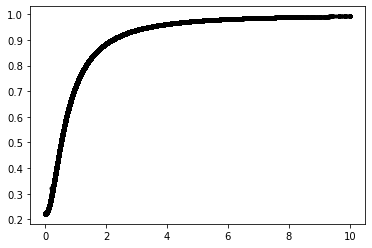

In [30]:
plt.plot(fd[selg]['SHAPE_R'],df[selg],'k.')

In [36]:
importlib.reload(densvar)

256 True


<module 'LSS.imaging.densvar' from '../py/LSS/imaging/densvar.py'>

randoms done
data done


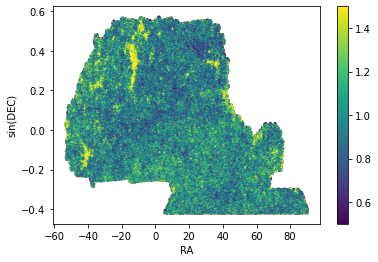

In [34]:
densvar.plot_hpdens(fr,fd,reg='DS')

randoms done


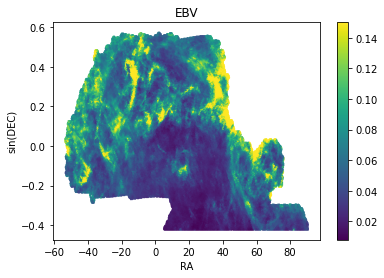

In [39]:
densvar.plot_hpprop(fr,'EBV',reg='DS',vx=.15)

In [16]:
selg = gfw < 2

randoms done


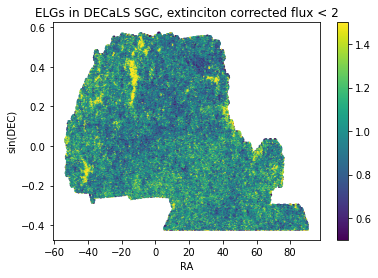

In [17]:
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='ELGs in DECaLS SGC, extinciton corrected flux < 2')

randoms done


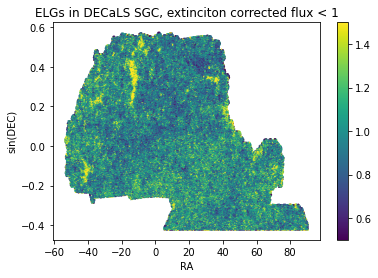

In [18]:
selg = gfw < 1
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='ELGs in DECaLS SGC, extinciton corrected flux < 1')

randoms done


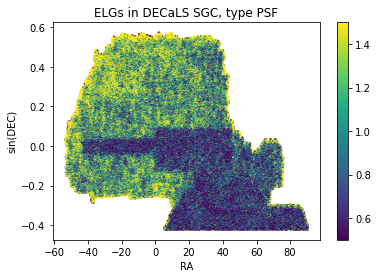

In [20]:
selg = fd['MORPHTYPE'] == 'PSF'
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='ELGs in DECaLS SGC, type PSF')

randoms done


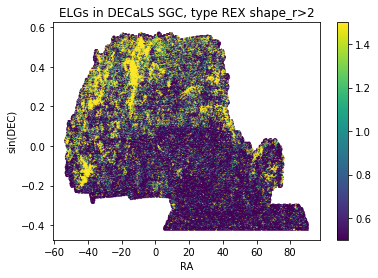

In [33]:
selg = fd['MORPHTYPE'] == 'REX'
selg &= fd['SHAPE_R'] > 2
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='ELGs in DECaLS SGC, type REX shape_r>2')

randoms done


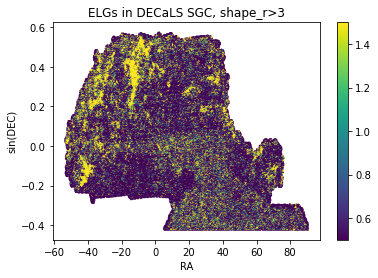

378945


In [36]:
selg = fd['SHAPE_R'] > 3
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='ELGs in DECaLS SGC, shape_r>3')
print(len(fd[selg]))

In [51]:
from desitarget import targetmask
from desitarget.sv1 import sv1_targetmask

In [52]:
sv1_targetmask.desi_mask

sv1_desi_mask:
  - [LRG,              0, "LRG", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MORE_ZGOOD': 3200}, 'numobs': 2}]
  - [ELG,              1, "ELG", {'obsconditions': 'DARK|GRAY', 'priorities': {'UNOBS': 3000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3000, 'MORE_ZGOOD': 3000}, 'numobs': 1}]
  - [QSO,              2, "QSO", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3400, 'MORE_ZGOOD': 3350, 'MORE_ZWARN': 3300, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 4}]
  - [LRG_OPT,          3, "LRG from baseline version of optical cuts", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MORE_ZGOOD': 3200}, 'numobs': 4}]
  - [LRG_IR,           4, "LRG from baseline version of IR cuts", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MORE_ZGOOD': 3200}, 'nu

In [35]:
len(fd[selg])

1376184

randoms done


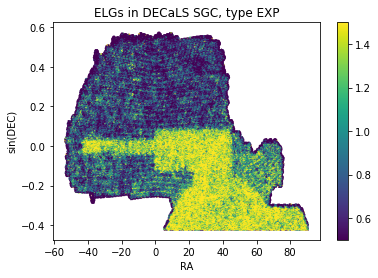

In [23]:
selg = fd['MORPHTYPE'] == 'EXP'
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='ELGs in DECaLS SGC, type EXP')

randoms done


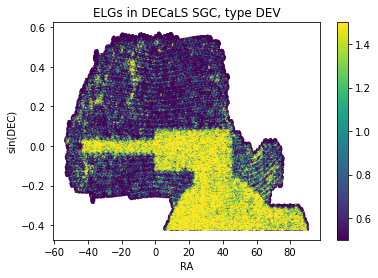

In [24]:
selg = fd['MORPHTYPE'] == 'DEV'
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='ELGs in DECaLS SGC, type DEV')

randoms done


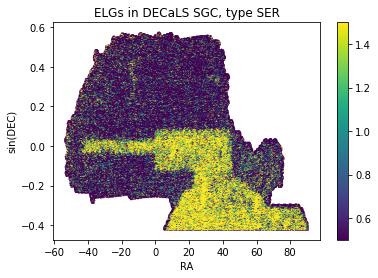

In [25]:
selg = fd['MORPHTYPE'] == 'SER'
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='ELGs in DECaLS SGC, type SER')

In [6]:
ds = densvar.densvar(type='LRG',sdir=sdir)

In [6]:
fd.dtype.names

('BRICKID',
 'BRICKNAME',
 'MORPHTYPE',
 'RA',
 'DEC',
 'DCHISQ',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'MASKBITS',
 'PHOTSYS',
 'TARGETID',
 'DESI_TARGET')

In [7]:
dg = fd['FLUX_G']-fd['FIBERFLUX_G']

In [8]:
dgp = dg/fd['FLUX_G']

In [8]:
import healpy as hp

In [9]:
dth,dphi = densvar.radec2thphi(fd['RA'],fd['DEC'])

In [10]:
dpix = hp.ang2pix(densvar.nside,dth,dphi,nest=densvar.nest)

In [11]:
pixlg = np.zeros(12*densvar.nside*densvar.nside)
#pixlgd = np.zeros(12*densvar.nside*densvar.nside)
pixlsr = np.zeros(12*densvar.nside*densvar.nside)
for i in range(0,len(dpix)):
    pix = dpix[i]
    pixlg[pix] += 1.
    pixlsr[pix] += fd['SHAPE_R'][i]
    #pixlgd[pix] += dgp[i]

In [13]:
pixlsrnp = np.zeros(12*densvar.nside*densvar.nside)
pixlgnp = np.zeros(12*densvar.nside*densvar.nside)
sel = fd['MORPHTYPE'] != 'PSF'
dpixp = dpix[sel]
fds = fd[sel]['SHAPE_R']
for i in range(0,len(dpixp)):
    pix = dpixp[i]
    pixlgnp[pix] += 1.
    pixlsrnp[pix] += fds[i]
del fds

In [36]:
wp = pixlg > 0
meanfibd = pixlgd[wp]/pixlg[wp]
pixls = []
for i in range(0,len(pixlg)):
    if pixlg[i] > 0:
        pixls.append(i)
pixls = np.array(pixls).astype(int)        
th,phi = hp.pix2ang(densvar.nside,pixls,nest=densvar.nest)
ra,dec = densvar.thphi2radec(th,phi)

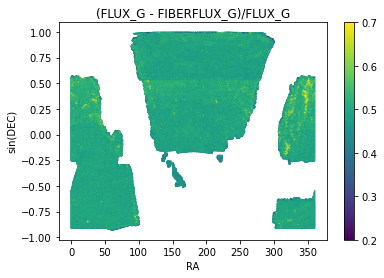

In [42]:
plt.scatter(ra,np.sin(dec*np.pi/180),c=meanfibd,s=.1,vmin=.2,vmax=.7)
plt.ylabel('sin(DEC)')
plt.xlabel('RA')
plt.colorbar()
plt.title(('(FLUX_G - FIBERFLUX_G)/FLUX_G'))
plt.show()

In [44]:
wp = pixlg > 0
meansr = pixlsr[wp]/pixlg[wp]
pixls = []
for i in range(0,len(pixlg)):
    if pixlg[i] > 0:
        pixls.append(i)
pixls = np.array(pixls).astype(int)        
th,phi = hp.pix2ang(densvar.nside,pixls,nest=densvar.nest)
ra,dec = densvar.thphi2radec(th,phi)

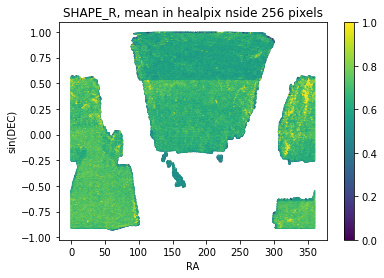

In [48]:
plt.scatter(ra,np.sin(dec*np.pi/180),c=meansr,s=.1,vmax=1)#,vmin=.2,vmax=.7)
plt.ylabel('sin(DEC)')
plt.xlabel('RA')
plt.colorbar()
plt.title(('SHAPE_R, mean in healpix nside 256 pixels'))
plt.show()

In [41]:
meansra = pixlsrnp/pixlgnp

380846

In [58]:
importlib.reload(densvar)

256 True


<module 'LSS.imaging.densvar' from '../py/LSS/imaging/densvar.py'>

randoms done
data done
102271
102206


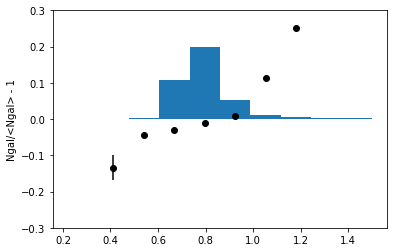

fraction of randoms not included in plot: 0.010637529886606888


([0.284568564593792,
  0.41250871568918224,
  0.5404488667845726,
  0.6683890178799629,
  0.7963291689753532,
  0.9242693200707435,
  1.0522094711661338,
  1.1801496222615242,
  1.3080897733569143,
  1.436029924452305],
 array([0.60437332, 0.86585728, 0.95673598, 0.96907652, 0.9878935 ,
        1.00793337, 1.11373429, 1.25088903, 1.39592369, 1.56624387]),
 array([0.08815691, 0.03502884, 0.00324747, 0.00054648, 0.00040638,
        0.00078729, 0.00172218, 0.00274787, 0.00366867, 0.00479445]))

In [60]:
densvar.densvsinput_pix(fr,fd,meansra,reg='DS',vmax=1.5)

randoms done
data done
102271
102271


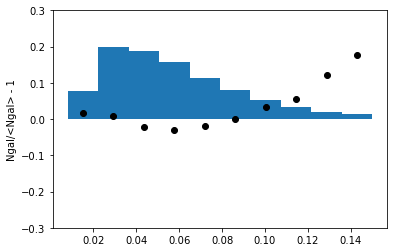

fraction of randoms not included in plot: 0.03135138218105747


([0.01512843556702137,
  0.029325440526008606,
  0.04352244734764099,
  0.057719454169273376,
  0.07191646099090576,
  0.08611346781253815,
  0.10031047463417053,
  0.11450748145580292,
  0.1287044882774353,
  0.14290151000022888],
 array([1.0161181 , 1.00724342, 0.97839483, 0.96987908, 0.98172424,
        0.99897878, 1.03339343, 1.05569997, 1.1215516 , 1.17715033]),
 array([0.00104193, 0.0006469 , 0.00065307, 0.00070874, 0.00084181,
        0.00101005, 0.00125995, 0.00159703, 0.00215642, 0.00275832]))

In [59]:
densvar.densvsimpar_pix(fr,fd,'EBV',reg='DS',vmax=.15)

In [14]:
wp = pixlgnp > 0
meansr = pixlsrnp[wp]/pixlgnp[wp]
pixls = []
for i in range(0,len(pixlgnp)):
    if pixlgnp[i] > 0:
        pixls.append(i)
pixls = np.array(pixls).astype(int)        
th,phi = hp.pix2ang(densvar.nside,pixls,nest=densvar.nest)
ra,dec = densvar.thphi2radec(th,phi)

<ipython-input-42-aab595b6c46c>:1: RuntimeWarning: invalid value encountered in true_divide
  meansra = pixlsrnp/pixlgnp


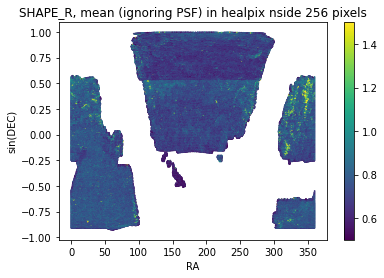

In [22]:
plt.scatter(ra,np.sin(dec*np.pi/180),c=meansr,s=.1,vmin=.5,vmax=1.5)#,vmin=.2,vmax=.7)
plt.ylabel('sin(DEC)')
plt.xlabel('RA')
plt.colorbar()
plt.title(('SHAPE_R, mean (ignoring PSF) in healpix nside 256 pixels'))
plt.show()

In [25]:
pixls = np.arange(12*densvar.nside*densvar.nside,dtype=int)

In [27]:
pixls[0]

0

In [13]:
meanfibda = pixlgd/pixlg

<ipython-input-13-746f6723acbd>:1: RuntimeWarning: invalid value encountered in true_divide
  meanfibda = pixlgd/pixlg


In [14]:
ds = densvar.densvar(type='ELG',sdir=sdir)

47917454
47917454
44353765
44353765
51738616
49302231
45817186
45817186


randoms done
284052
284052


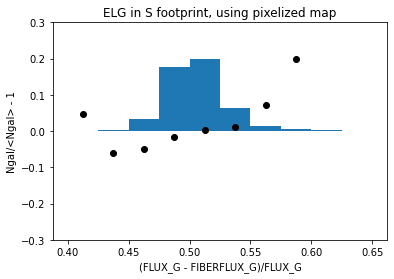

fraction of randoms not included in plot: 0.006122374318159777


([0.41250000000000003,
  0.4375,
  0.4625,
  0.48750000000000004,
  0.5125,
  0.5375000000000001,
  0.5625,
  0.5875000000000001,
  0.6125,
  0.6375],
 array([1.04620751, 0.93939391, 0.95027459, 0.98299573, 1.00253031,
        1.01147619, 1.071379  , 1.19795463, 1.35942507, 1.54850352]),
 array([0.00459846, 0.00202664, 0.00065335, 0.00029452, 0.00028049,
        0.00049804, 0.00109802, 0.00200986, 0.00294122, 0.00384972]))

In [56]:
wp = pixlg > 0
ds.densvsinput_pix(meanfibda,wp,reg='S',vmin=.4,vmax=.65,xlab='(FLUX_G - FIBERFLUX_G)/FLUX_G')

randoms done
97674
97674


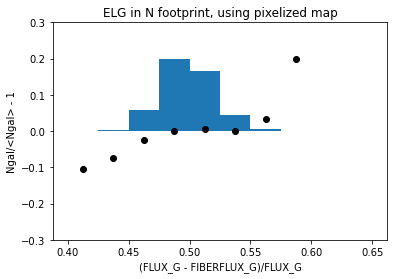

fraction of randoms not included in plot: 0.0006693028835777823


([0.41250000000000003,
  0.4375,
  0.4625,
  0.48750000000000004,
  0.5125,
  0.5375000000000001,
  0.5625,
  0.5875000000000001,
  0.6125,
  0.6375],
 array([0.89495734, 0.92466425, 0.97562311, 1.00082291, 1.00639536,
        0.99946751, 1.0328867 , 1.19947596, 1.4102278 , 1.6202406 ]),
 array([0.00778253, 0.00290153, 0.00082854, 0.00045002, 0.00049685,
        0.00096512, 0.0025102 , 0.0065508 , 0.01540704, 0.02588825]))

In [55]:
wp = pixlg > 0
ds.densvsinput_pix(meanfibda,wp,reg='N',vmin=.4,vmax=.65,xlab='(FLUX_G - FIBERFLUX_G)/FLUX_G')

randoms done
102227
102227


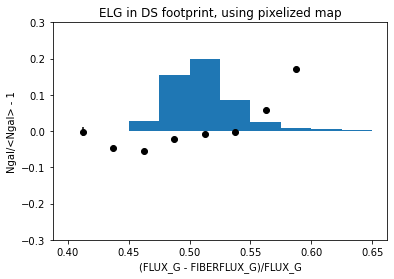

fraction of randoms not included in plot: 0.01329785522117586


([0.41250000000000003,
  0.4375,
  0.4625,
  0.48750000000000004,
  0.5125,
  0.5375000000000001,
  0.5625,
  0.5875000000000001,
  0.6125,
  0.6375],
 array([0.99874017, 0.95365701, 0.94392898, 0.9775525 , 0.99280822,
        0.99671784, 1.05821302, 1.17237344, 1.32292336, 1.48637773]),
 array([0.01275311, 0.0048025 , 0.00122923, 0.00052868, 0.00047011,
        0.00071879, 0.00135427, 0.00231237, 0.00325274, 0.00413208]))

In [57]:
wp = pixlg > 0
ds.densvsinput_pix(meanfibda,wp,reg='DS',vmin=.4,vmax=.65,xlab='(FLUX_G - FIBERFLUX_G)/FLUX_G')

randoms done
113549
113549


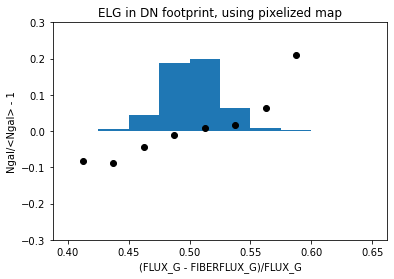

fraction of randoms not included in plot: 0.002093578260584293


([0.41250000000000003,
  0.4375,
  0.4625,
  0.48750000000000004,
  0.5125,
  0.5375000000000001,
  0.5625,
  0.5875000000000001,
  0.6125,
  0.6375],
 array([0.91905876, 0.91150084, 0.95728272, 0.99069417, 1.00773699,
        1.01710018, 1.06340126, 1.20937939, 1.41460651, 1.59869287]),
 array([0.00512442, 0.00237854, 0.00091586, 0.00045911, 0.00044933,
        0.0008034 , 0.0020599 , 0.00452948, 0.00770277, 0.01273748]))

In [58]:
wp = pixlg > 0
ds.densvsinput_pix(meanfibda,wp,reg='DN',vmin=.4,vmax=.65,xlab='(FLUX_G - FIBERFLUX_G)/FLUX_G')

In [52]:
len(meanfibd)

380938

In [64]:
wm = pixlg > 0
wm &= meanfibda > 0.45
wm &= meanfibda < 0.55
print(len(meanfibda[wm]))

358178


In [60]:
358178/380938

randoms done
94321
94321


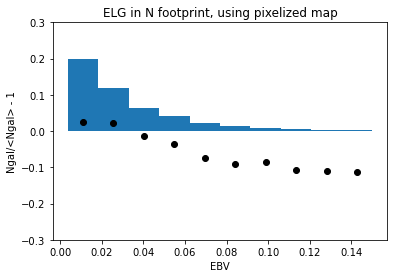

fraction of randoms not included in plot: 0.007961623197948171


([0.0109937135130167,
  0.025625955313444138,
  0.040258195251226425,
  0.05489043518900871,
  0.0695226788520813,
  0.08415491878986359,
  0.09878715872764587,
  0.11341939866542816,
  0.12805163860321045,
  0.14268389344215393],
 array([1.02470145, 1.02107721, 0.9858036 , 0.96466893, 0.9251479 ,
        0.91037743, 0.91532632, 0.89247043, 0.88971432, 0.88790893]),
 array([0.00046606, 0.00060086, 0.0008047 , 0.00098099, 0.00131601,
        0.00171317, 0.00212254, 0.00250197, 0.00306156, 0.00345783]))

In [71]:
ds.densvsimpar_pix('EBV',reg='N',wsel=wm,vmax=0.15)

358178
randoms done
107421
107421


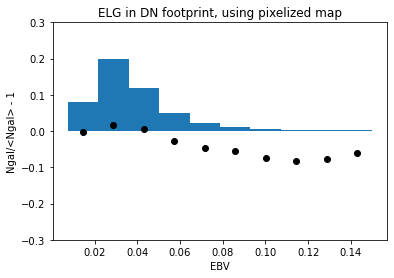

fraction of randoms not included in plot: 0.004075238915039762


([0.014535857364535332,
  0.028795242309570312,
  0.043054625391960144,
  0.057314008474349976,
  0.07157339155673981,
  0.08583277463912964,
  0.10009215772151947,
  0.1143515408039093,
  0.12861092388629913,
  0.14287030696868896],
 array([0.99872444, 1.01813911, 1.00546252, 0.97338329, 0.95435908,
        0.9448183 , 0.92628301, 0.91860536, 0.92336275, 0.93887284]),
 array([0.00071314, 0.00045294, 0.00058709, 0.00087701, 0.00130086,
        0.00182695, 0.00231989, 0.00304056, 0.00379013, 0.00460475]))

In [74]:
wm = pixlg > 0
wm &= meanfibda > 0.45
wm &= meanfibda < 0.55
print(len(meanfibda[wm]))
ds.densvsimpar_pix('EBV',reg='DN',wsel=wm,vmax=0.15)

358178
randoms done
91005
91005


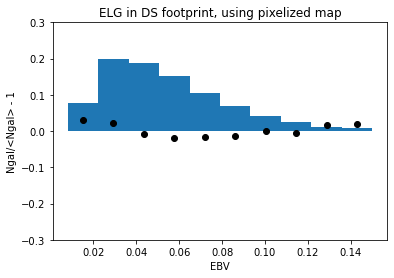

fraction of randoms not included in plot: 0.013943168241834083


([0.01512843556702137,
  0.029325440526008606,
  0.04352244734764099,
  0.057719454169273376,
  0.07191646099090576,
  0.08611346781253815,
  0.10031047463417053,
  0.11450748145580292,
  0.1287044882774353,
  0.14290151000022888],
 array([1.03094456, 1.02251243, 0.99106951, 0.98050416, 0.9845192 ,
        0.98663897, 1.00129447, 0.99395525, 1.01580709, 1.02084676]),
 array([0.00106285, 0.00066133, 0.00067371, 0.00074228, 0.00089797,
        0.00110973, 0.0014404 , 0.00185251, 0.00264685, 0.00347599]))

In [75]:
wm = pixlg > 0
wm &= meanfibda > 0.45
wm &= meanfibda < 0.55
print(len(meanfibda[wm]))
ds.densvsimpar_pix('EBV',reg='DS',wsel=wm,vmax=0.15)

(array([1.24000e+02, 3.27000e+02, 4.85500e+03, 3.11863e+05, 5.94130e+04,
        3.29900e+03, 9.29000e+02, 1.14000e+02, 1.10000e+01, 3.00000e+00]),
 array([0.22100589, 0.29686852, 0.37273115, 0.44859378, 0.52445641,
        0.60031904, 0.67618167, 0.75204431, 0.82790694, 0.90376957,
        0.9796322 ]),
 <a list of 10 Patch objects>)

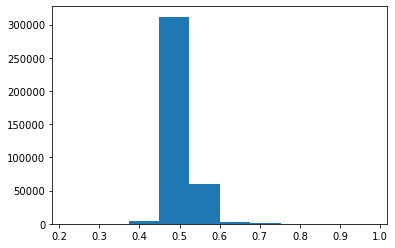

In [46]:
plt.hist(meanfibd)

In [10]:
dgt = fd['FLUX_G']-fd['FIBERTOTFLUX_G']

(array([  37339.,  115685., 5545513., 7821040., 8895252., 8698084.,
        6709062., 3925829., 1939852.,  535249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

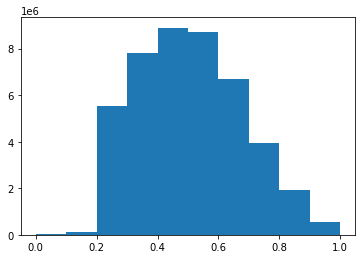

In [12]:
plt.hist(dgt/fd['FLUX_G'],range=(0,1))

In [13]:
dgf = fd['FIBERTOTFLUX_G']-fd['FIBERFLUX_G']

(array([       0.,        0.,        0.,        0.,        0., 43689688.,
          233310.,   109123.,    69557.,    50019.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

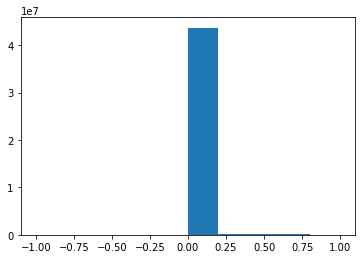

In [17]:
plt.hist(dgf/fd['FIBERFLUX_G'],range=(-1,1))

In [23]:
w = dgf > 0.1
print(len(dgf[w]),len(dgf))

330958 44353765


In [24]:
330958/44353765

0.00746177917477806

In [9]:
ranh = plt.hist(f['EBV'],range=(0,.2))
dh = plt.hist(d['EBV'],bins=ranh[1])
norm = np.sum(ranh[0])/np.sum(dh[0])
dh[0]/ranh[0]*norm

ValueError: no field of name EBV

In [2]:
import astropy.io.fits as fits

In [3]:
random = fits.getdata('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.49.0/randomsDR9v0.49.0_0_masked.fits')

In [4]:
data = fits.getdata('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.49.0/randomsDR9v0.49.0_0_masked.fits')

In [4]:
random.dtype.names

('RA', 'DEC', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS', 'PHOTSYS')

11772334
11772334
10880083
10880083
51738616
49302231
45817186
45817186
randoms done


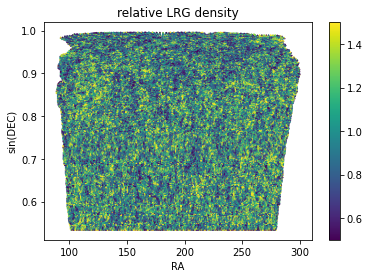

In [14]:
densvar.plot_hpdens('LRG',sdir=sdir,reg='N')

11772334
11772334
10880083
10880083
51738616
49302231
45817186
45817186
randoms done


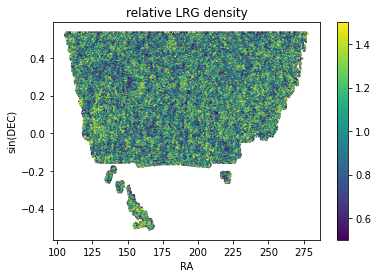

In [15]:
densvar.plot_hpdens('LRG',sdir=sdir,reg='DN')

11772334
11772334
10880083
10880083
51738616
49302231
45817186
45817186
randoms done


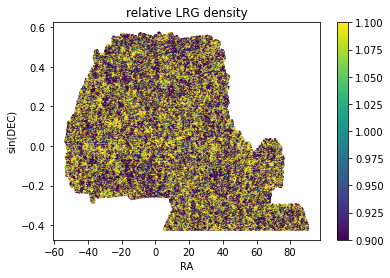

In [17]:
densvar.plot_hpdens('LRG',sdir=sdir,reg='DS',vx=1.1,vm=.9)

380938
randoms done


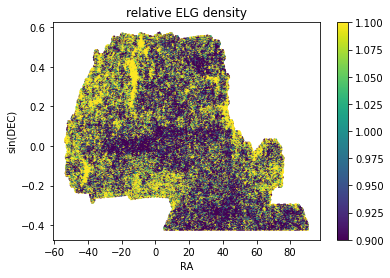

In [43]:
wm = pixlg > 0
#wm &= meanfibda > 0.45
#wm &= meanfibda < 0.55
print(len(meanfibda[wm]))
ds.plot_hpdens(reg='DS',vx=1.1,vm=.9,wsel=wm)

358178
randoms done


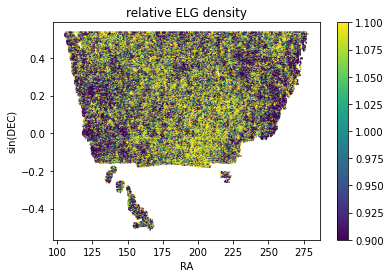

In [21]:
wm = pixlg > 0
wm &= meanfibda > 0.45
wm &= meanfibda < 0.55
print(len(meanfibda[wm]))
ds.plot_hpdens(reg='DN',vx=1.1,vm=.9,wsel=wm)

358178
randoms done


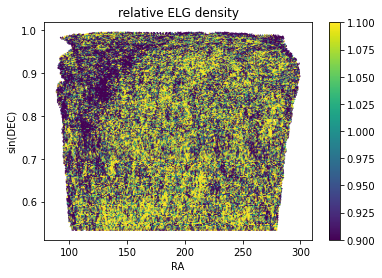

In [22]:
wm = pixlg > 0
wm &= meanfibda > 0.45
wm &= meanfibda < 0.55
print(len(meanfibda[wm]))
ds.plot_hpdens(reg='N',vx=1.1,vm=.9,wsel=wm)

In [17]:
import importlib

In [41]:
importlib.reload(densvar)

256 True


<module 'LSS.imaging.densvar' from '../py/LSS/imaging/densvar.py'>

In [42]:
ds = densvar.densvar(type='ELG',sdir=sdir,ti=['SER','DEV'])

['RA', 'DEC', 'PHOTSYS', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS', 'EBV', 'GALDEPTH_G', 'GALDEPTH_R', 'GALDEPTH_Z', 'BRICKID']
47917454
47917454
44353765
41414010
51738616
49302231
45817186
45817186


In [40]:
c = [1,2]
a = c.copy()
a

[1, 2]

randoms done


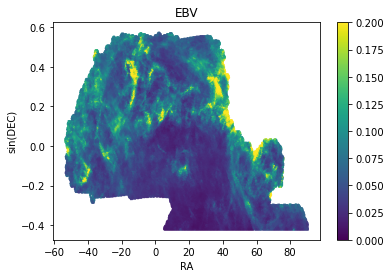

In [77]:
ds.plot_hpprop('EBV',reg='DS',vm=0,vx=.2)

randoms done
102271
102271


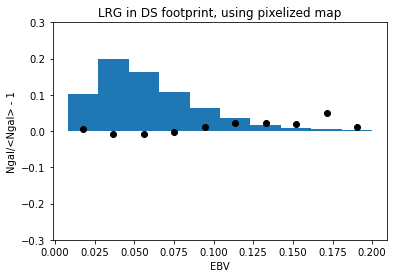

fraction of randoms not included in plot: 0.010643863547940936


([0.017628435045480728,
  0.03682544082403183,
  0.05602245032787323,
  0.07521945238113403,
  0.09441646188497543,
  0.11361347138881683,
  0.13281047344207764,
  0.15200749039649963,
  0.17120447754859924,
  0.19040149450302124],
 array([1.00455821, 0.99265365, 0.99264738, 0.99870912, 1.01037966,
        1.02163903, 1.02184144, 1.02080051, 1.04996866, 1.01253418]),
 array([0.00153078, 0.00109348, 0.00120716, 0.00150309, 0.00195082,
        0.00264659, 0.00372543, 0.00507616, 0.00670049, 0.00775075]))

In [6]:
ds.densvsimpar_pix('EBV','DS',vmax=.2)

randoms done
97717
97717


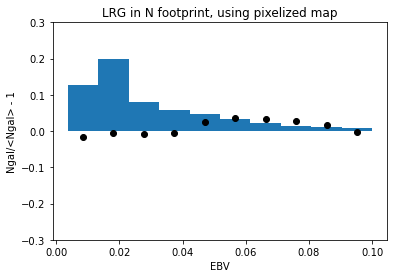

fraction of randoms not included in plot: 0.0479646158668496


([0.008493713103234768,
  0.018125953152775764,
  0.027758194133639336,
  0.03739043325185776,
  0.04702267795801163,
  0.0566549152135849,
  0.06628715991973877,
  0.07591939717531204,
  0.08555163443088531,
  0.09518387913703918],
 array([0.98494642, 0.99596373, 0.9919469 , 0.993389  , 1.02529502,
        1.03511038, 1.03369593, 1.02846682, 1.01784597, 0.99791292]),
 array([0.00132937, 0.0010636 , 0.00168549, 0.00196704, 0.00223412,
        0.00261855, 0.00326134, 0.0039261 , 0.00460234, 0.005264  ]))

In [11]:
ds.densvsimpar_pix('EBV','N',vmax=.1)

randoms done
113630
113630


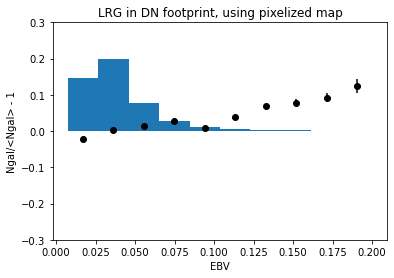

fraction of randoms not included in plot: 0.0006156351942307363


([0.01703585684299469,
  0.036295242607593536,
  0.055554624646902084,
  0.07481400668621063,
  0.09407338500022888,
  0.11333277821540833,
  0.13259215652942657,
  0.15185153484344482,
  0.17111092805862427,
  0.19037030637264252],
 array([0.97796741, 1.00282728, 1.01278938, 1.02810607, 1.00814017,
        1.03759244, 1.06963233, 1.07880514, 1.09182572, 1.12338277]),
 array([0.00098744, 0.0008526 , 0.0013837 , 0.00236319, 0.00342244,
        0.00497122, 0.00644298, 0.0087259 , 0.01209784, 0.01899678]))

In [8]:
ds.densvsimpar_pix('EBV','DN',vmax=.2)

randoms done
284205
284205


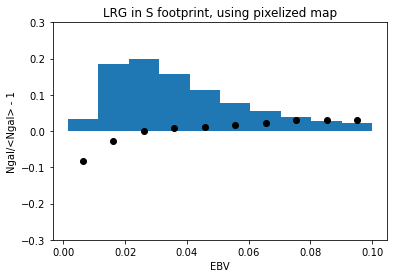

fraction of randoms not included in plot: 0.05900181032845016


([0.0063527910970151424,
  0.016210392117500305,
  0.02606799453496933,
  0.035925593227148056,
  0.04578319564461708,
  0.05564079433679581,
  0.06549839675426483,
  0.07535599172115326,
  0.08521360158920288,
  0.09507119655609131],
 array([0.91741143, 0.97330927, 0.9995886 , 1.00768574, 1.01252553,
        1.0158356 , 1.02201502, 1.02938321, 1.03009945, 1.02919445]),
 array([0.00183768, 0.00079509, 0.00077426, 0.00087303, 0.00103441,
        0.00124584, 0.00148938, 0.00179817, 0.00208507, 0.00240175]))

In [10]:
ds.densvsimpar_pix('EBV','S',vmax=.1)

randoms done
113630
113630


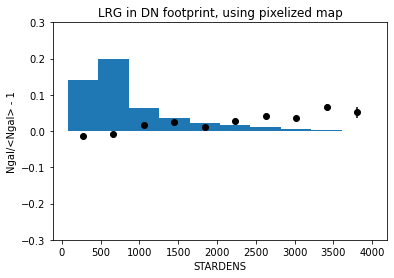

fraction of randoms not included in plot: 0.0008990962969091205


([272.4418640136719,
  664.81640625,
  1057.19091796875,
  1449.5654296875,
  1841.9400634765625,
  2234.314697265625,
  2626.689208984375,
  3019.063720703125,
  3411.438232421875,
  3803.812744140625],
 array([0.98725003, 0.99138157, 1.01692348, 1.02626547, 1.01092394,
        1.02810045, 1.04100019, 1.03573628, 1.0664217 , 1.05147297]),
 array([0.00103187, 0.00086976, 0.00155903, 0.0020635 , 0.00260001,
        0.00305077, 0.00392448, 0.00580019, 0.00904169, 0.01534547]))

In [15]:
ds.densvsimpar_pix('STARDENS','DN',vmax=4000)

maximum brickid is 520062
randoms done


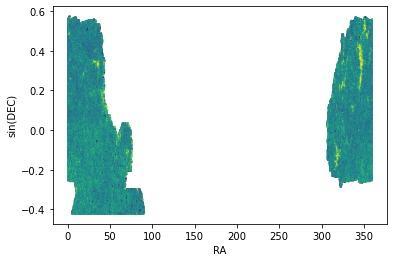

In [88]:
ds.plot_brickdens(reg='DS')

randoms done
102387
4908


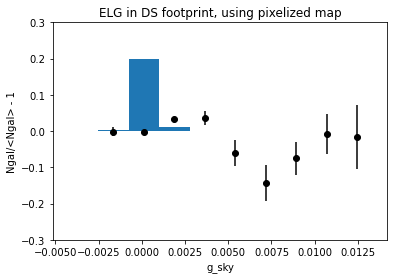

fraction of randoms not included in plot: 0.0


([-0.0034004597226157786,
  -0.0016399849904701112,
  0.00012048974167555614,
  0.0018809644738212233,
  0.00364143920596689,
  0.005401913938112558,
  0.007162388670258225,
  0.008922863402403891,
  0.01068333813454956,
  0.012443812866695226],
 array([1.51355006, 0.99868072, 0.99796658, 1.03313475, 1.0369781 ,
        0.93974593, 0.85799572, 0.92478604, 0.99125607, 0.98396711]),
 array([0.11127841, 0.01221634, 0.00140799, 0.00584149, 0.01987949,
        0.03680329, 0.04995444, 0.04454538, 0.0549006 , 0.0890842 ]))

In [89]:
ds.densvsskyres_pix('g_sky','DS')

In [ ]:
ds.densvsimpar_pix('EBV',vmax=.15,reg='N')

In [82]:
rf = fitsio.read('/global/u2/r/rongpu/share/desi/sky_residual_dr9_partial/sky_residual_dr9_north_256.fits')

In [83]:
rf.dtype.names

('hp_idx',
 'count',
 'g_sky',
 'r_sky',
 'z_sky',
 'g_blobsky',
 'r_blobsky',
 'z_blobsky',
 'w1_sky_5_7',
 'w1_sky_7_9',
 'w1_sky_9_11',
 'w2_sky_5_7',
 'w2_sky_7_9',
 'w2_sky_9_11',
 'ra',
 'dec')